## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [1]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [2]:
# your code here
data = pd.read_csv(
    "https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv"
)
#первые 5 строк
data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


In [ ]:
#последние 5 строк
data.tail()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
999,no checking account,30,no credits taken/all credits paid back duly,car (used),6350,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,car or other,31,none,rent,1,skilled employee/official,0 to 2,no,no,bad


In [ ]:
#размер датафрейма
data.shape

(1000, 21)

### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [ ]:
data.isnull().sum()#количество NaN в каждом столбце
#так как во всех столбцах сумма 0, то пропуски отсутствуют

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [ ]:
data.dtypes
#смотрим типы данных столбцов, чтобы разделить

status                     object
duration                    int64
credit_history             object
purpose                    object
amount                      int64
savings                    object
employment_duration        object
installment_rate           object
personal_status_sex        object
other_debtors              object
present_residence          object
property                   object
age                         int64
other_installment_plans    object
housing                    object
number_credits             object
job                        object
people_liable              object
telephone                  object
foreign_worker             object
credit_risk                object
dtype: object

In [ ]:
data['status'].value_counts()

... >= 200 DM / salary for at least 1 year    394
no checking account                           274
... < 0 DM                                    269
0<= ... < 200 DM                               63
Name: status, dtype: int64

In [ ]:
data['present_residence'].value_counts()

>= 7 yrs            413
1 <= ... < 4 yrs    308
4 <= ... < 7 yrs    149
< 1 yr              130
Name: present_residence, dtype: int64

In [ ]:
data['installment_rate'].value_counts()

< 20              476
25 <= ... < 35    231
20 <= ... < 25    157
>= 35             136
Name: installment_rate, dtype: int64

In [ ]:
data['people_liable'].value_counts()

0 to 2       845
3 or more    155
Name: people_liable, dtype: int64

In [ ]:
data['present_residence'].value_counts()

1       633
2-3     333
4-5      28
>= 6      6
Name: number_credits, dtype: int64

In [ ]:
data['number_credits'].value_counts()

unknown/no savings account    603
... >= 1000 DM                183
... <  100 DM                 103
100 <= ... <  500 DM           63
500 <= ... < 1000 DM           48
Name: savings, dtype: int64

In [ ]:
data['savings'].value_counts()

unknown/no savings account    603
... >= 1000 DM                183
... <  100 DM                 103
100 <= ... <  500 DM           63
500 <= ... < 1000 DM           48
Name: savings, dtype: int64

In [ ]:
#из описания датасета выявили, что
#Количественные признаки - duration, amount, age
#Бинарные - telephone, foreign_worker
#Порядковые - employment_duration, installment_rate, present_residence, status, people_liable, number_credits, savings- упорядоченная категория
#Категориальные - credit_history, purpose, personal_status_sex, other_debtors, property, other_installment_plans, housing, job
#installment_rate - порядковый, тк имеет 4 категории, к которым могут относиться значения и они представлены отрезками, разделяющими упорядоченные значения
#present_residence - порядковый, тк разделено по годам, которые разделены по возрастанию
#status - порядковый, 3 отрезка: меньше 0, от 0 до 200D и больше 200, также упорядочены
#present_residence, people_liable, savings, number_credits - упорядоченнные категории, так как разделены на отрезки, значения в которых идут по порядку
#credit_risk - целевая переменная

In [ ]:
data.describe() # числовые признаки

,duration,amount,age
count,1000.000000,1000.00000,1000.00000
mean,20.903000,3271.24800,35.54200
std,12.058814,2822.75176,11.35267
min,4.000000,250.00000,19.00000
25%,12.000000,1365.50000,27.00000
50%,18.000000,2319.50000,33.00000
75%,24.000000,3972.25000,42.00000
max,72.000000,18424.00000,75.00000


In [ ]:
data.describe(include = 'object') # категориальные признаки

,status,credit_history,purpose,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,5,10,5,5,4,4,3,4,4,3,3,4,4,2,2,2,2
top,... >= 200 DM / salary for at least 1 year,no credits taken/all credits paid back duly,furniture/equipment,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,>= 7 yrs,building soc. savings agr./life insurance,none,rent,1,skilled employee/official,0 to 2,no,no,good
freq,394,530,280,603,339,476,548,907,413,332,814,714,633,630,845,596,963,700


### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [ ]:
data.groupby('purpose')['amount'].mean()
#группируем по категориям и считаем среднее по столбцу с суммой кредита

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [ ]:
data['housing'].value_counts()#смотрим на значения, которые принимает столбец housing

rent        714
for free    179
own         107
Name: housing, dtype: int64

In [ ]:
#процент клиентов моложе 30 лет, который снимает жилье
data[data['age'] < 30]['age'].count()/data['age'].count()*100

36.9

In [ ]:
#процент клиентов старше 40 лет, который снимает жилье
data[data['age'] > 40]['age'].count()/data['age'].count()*100

27.200000000000003

### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [ ]:
#так как number_credits отнесли к порядковым, то смотрим, на какие отрезки были разделены значения и куда относятся значения больше 3
#видно, что больше 3 - это 4-5 и больше либо равно 6
data['number_credits'].value_counts()

1       633
2-3     333
4-5      28
>= 6      6
Name: number_credits, dtype: int64

In [ ]:
#Количество иностранцев (foreign_worker), у которых число кредитов (number_credits) больше 3? Ответ - один
data[(data['foreign_worker'] == 'yes') & ((data['number_credits'] == '4-5') | (data['number_credits'] == '>=6'))]['status'].count()

1

### Задание 6 (1 балл)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

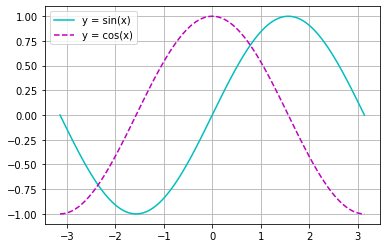

In [ ]:
x = np.linspace(-np.pi,np.pi,100)

# the function, which is y = sin(x) here
y = np.sin(x)
y1 = np.cos(x)

plt.plot(x,y,'c',label='y = sin(x)')
plt.plot(x, y1, '--m', label='y = cos(x)')
plt.grid(axis = 'both')
plt.legend()
plt.show()
#график для cos и sin

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

In [ ]:
data['status'].value_counts()

... >= 200 DM / salary for at least 1 year    394
no checking account                           274
... < 0 DM                                    269
0<= ... < 200 DM                               63
Name: status, dtype: int64

<AxesSubplot:title={'center':'Bad Risk'}, ylabel='status'>

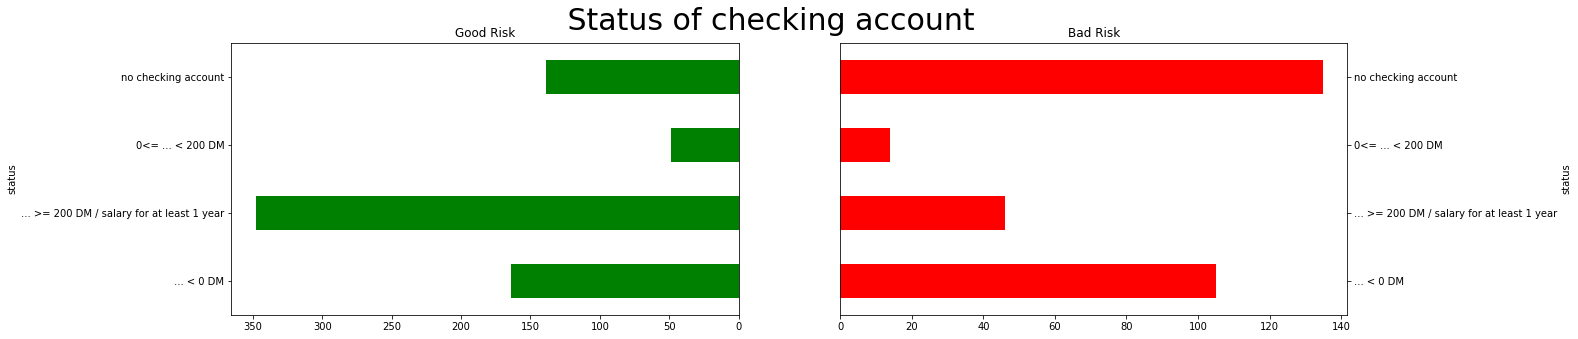

In [ ]:
good_data = pd.DataFrame(data[data['credit_risk'] == 'good'].groupby('status')['credit_risk'].count())
bad_data = pd.DataFrame(data[data['credit_risk'] != 'good'].groupby('status')['credit_risk'].count())
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5)) 
fig.suptitle(' Status of checking account ', fontsize=30)
good_data['credit_risk'].plot.barh(color = 'g', ax = axs[0]).invert_xaxis()
axs[0].title.set_text('Good Risk')
axs[1].title.set_text('Bad Risk')
ax = plt.gca()
ax.invert_yaxis()
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
bad_data['credit_risk'].plot.barh(color = 'r', ax = axs[1])
#по графику видно, что если размер текущего счета >= 200 DM, то больше значение good, а у тех, у кого счет <0 больше значений bad


### Задание 8  (0.5 балла)

In [4]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

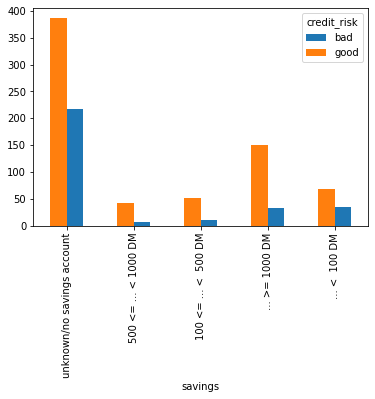

In [ ]:
#с помощью matplotlib
data.pivot_table('foreign_worker', 'savings', 'credit_risk', 'count').plot(kind='bar').invert_xaxis()

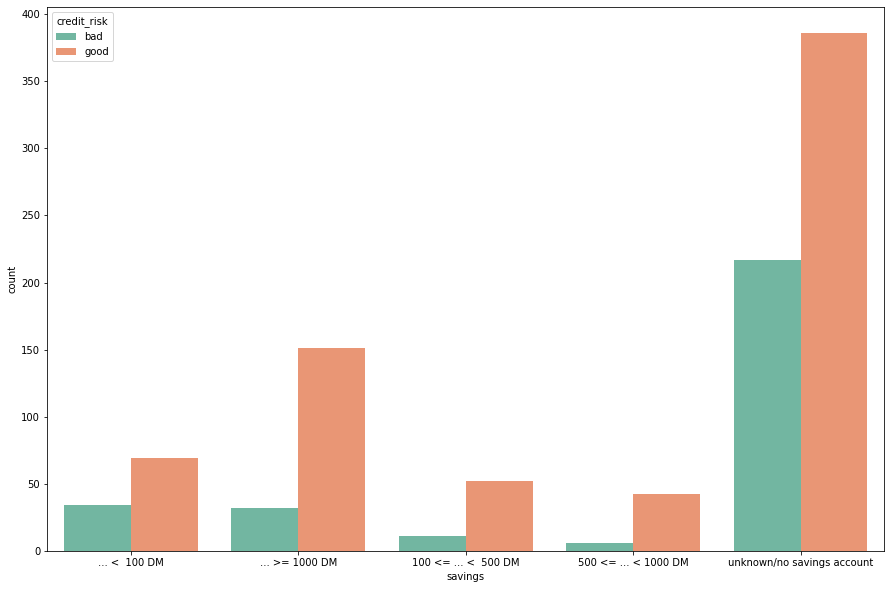

In [ ]:
#с помощью seaborn
df = data.groupby(['savings', 'credit_risk']).agg(count=("foreign_worker", 'count'))
df = df.reset_index()
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x="savings",
y="count",
hue="credit_risk",
data=df,
palette ='Set2')
plt.show()
# больше понравился матплотлиб, тк быстро и легко. С точки зрения трудоемкости было сложнее разобраться с сиборном.
# по-моему, матплотлиб даже нагляднее и без лишних усилий.
#вывод по графикам - чем больше сбережений, тем больше разница между количеством good и bad.
#Если при <100DM их количество примерно одинаковое, то при >=1000DM количество good больше bad почти в 4 раза.

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

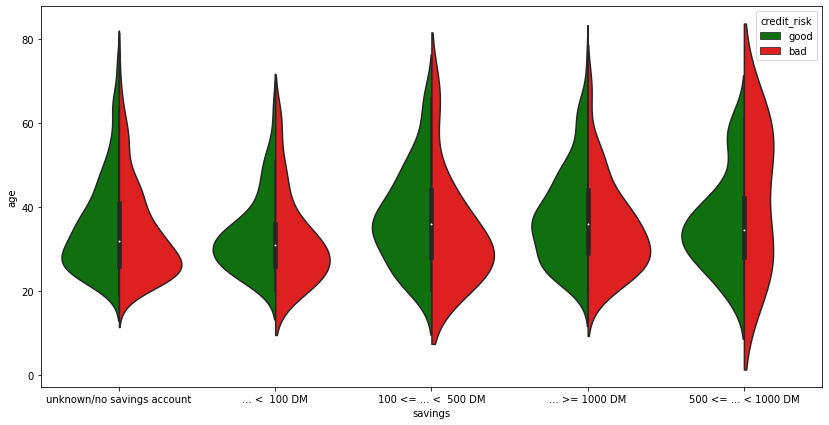

In [ ]:
# your code here

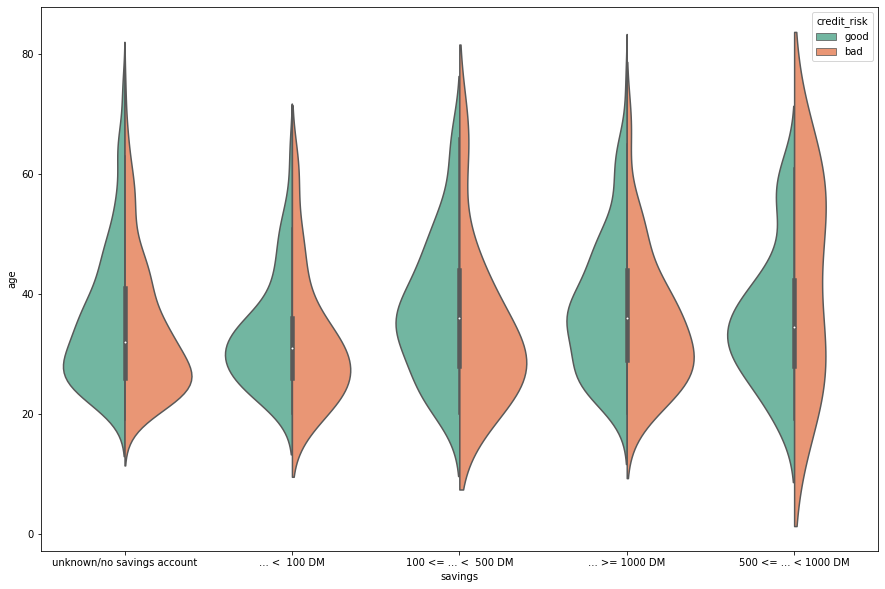

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.violinplot(x="savings",
y="age",
hue="credit_risk",
data=data, 
split=True,
palette ='Set2')
plt.show()
#Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, 
#но и их распределение по возрасту, например.
#видно, что при <100 количество good и bad примерно одинаково, большинство обладателей счета это люди в возрасте около 30 
#при 100<=..<=500 чуть больше good чем bad, притом у good люди чуть старше
#при 500<=..<=1000 много людей в возрасте 30 good, а bad не очень зависит от возраста
#при <=1000 больше good, притом у них больше людей в ворастном диапозоне от 30 до 40, в то время как bad у 30летних 

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

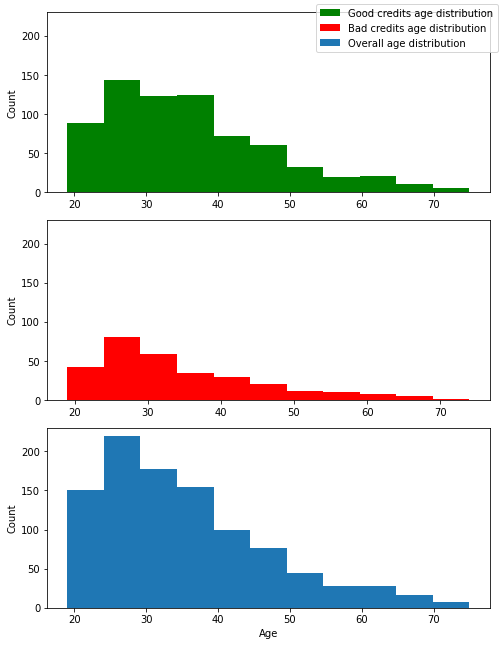

In [ ]:
# your code here

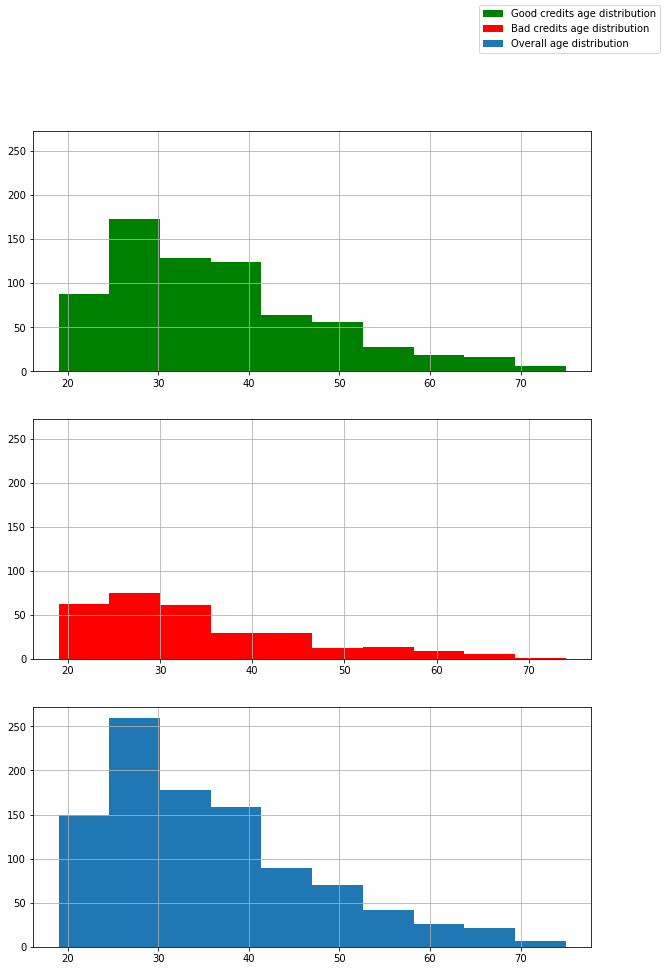

In [ ]:
#matplotlib
fig, axes = plt.subplots(3, 1, figsize=(10, 15), sharey=True)

data[data['credit_risk'] == 'good']['age'].hist(color='green', ax=axes[0], label = 'Good credits age distribution');

data[data['credit_risk'] == 'bad']['age'].hist( color = 'red', ax=axes[1], label = 'Bad credits age distribution');

data['age'].hist(ax=axes[2], label = 'Overall age distribution');
fig.legend()
#количество положительных оценок у людей в возрасте от 25 до 40, а плохих от 20 до 35. Большинство кредитов берут люди в возрасте от 25 до 30.

Text(0.5, 1.0, 'Risks')

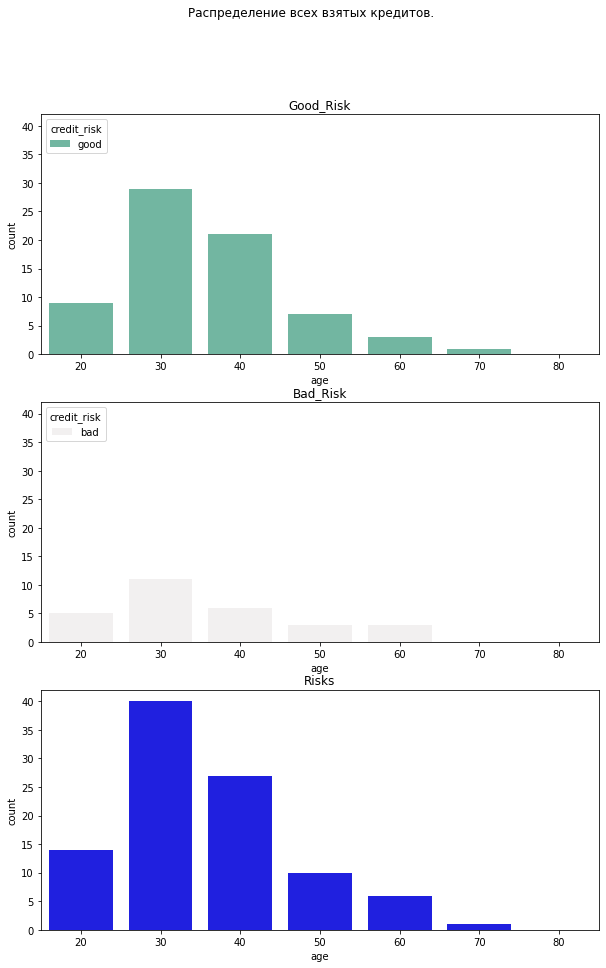

In [ ]:
#та же диаграмма с использованием seaborn, зависимость от age
df = data.groupby(['age', 'credit_risk']).agg(count=("foreign_worker", 'count'))
df = df.reset_index()
fig, axes = plt.subplots(3, 1, figsize=(10, 15), sharey=True)
fig.suptitle('Распределение всех взятых кредитов.')

sns.barplot(ax=axes[0], x='age', y="count", hue="credit_risk", data = df[df['credit_risk'] == 'good'], palette ='Set2', order =[20,30,40,50,60,70, 80])
axes[0].set_title("Good_Risk")

sns.barplot(ax=axes[1], x='age', y="count", hue="credit_risk", data = df[df['credit_risk'] == 'bad'], color = 'red', order =[20,30,40,50,60,70, 80])
axes[1].set_title("Bad_Risk")

df = data.groupby('age')['credit_risk'].agg(count = 'count')
df = df.reset_index()
sns.barplot(ax=axes[2], x = 'age', y = 'count', data = df, color ='blue', order =[20,30,40,50,60,70, 80])
axes[2].set_title("Risks")

In [ ]:
#та же диаграмма с использованием seaborn, зависимость от savings
df = data.groupby(['savings', 'credit_risk']).agg(count=("foreign_worker", 'count'))
df = df.reset_index()

fig, axes = plt.subplots(3, 1, figsize=(10, 15), sharey=True)
fig.suptitle('Распределение всех взятых кредитов.')

sns.barplot(ax=axes[0], x='savings', y="count", hue="credit_risk", data = df[df['credit_risk'] == 'good'], color ='green')
axes[0].set_title("Good_Risk")

sns.barplot(ax=axes[1], x='savings', y="count", hue="credit_risk", data = df[df['credit_risk'] == 'bad'], color = 'red')
axes[1].set_title("Bad_Risk")

df = data.groupby('savings')['credit_risk'].agg(count = 'count')
df = df.reset_index()
sns.barplot(ax=axes[2], x = 'savings', y = 'count', data = df, color ='blue')
axes[2].set_title("Risks")

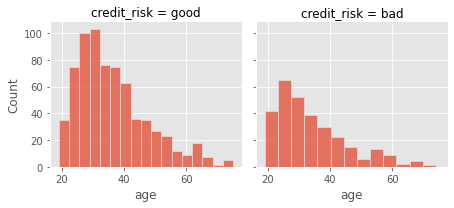

In [ ]:
#зависимость от возраста с использованием grid 
grid = sns.FacetGrid(data, col = "credit_risk", col_wrap=5) 
grid.map(sns.histplot, "age") 
plt.show() 

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

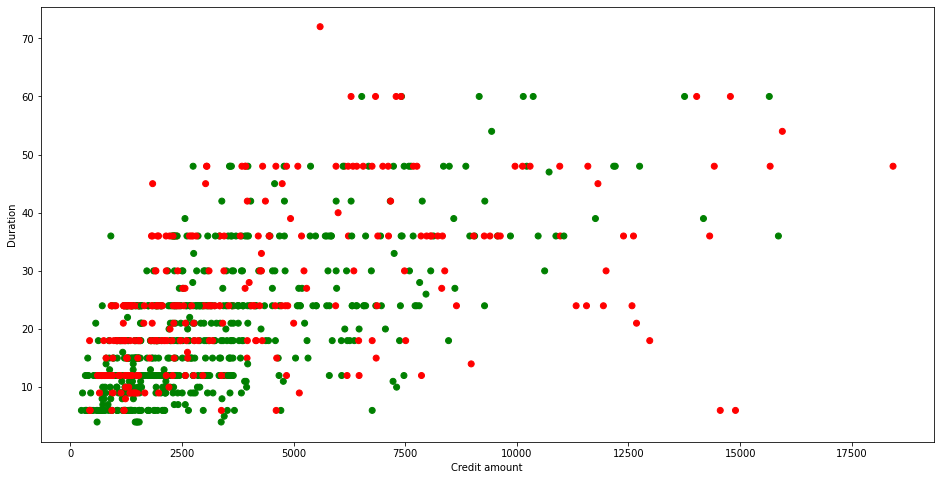

In [ ]:
# your code here

Text(0, 0.5, 'Duration')

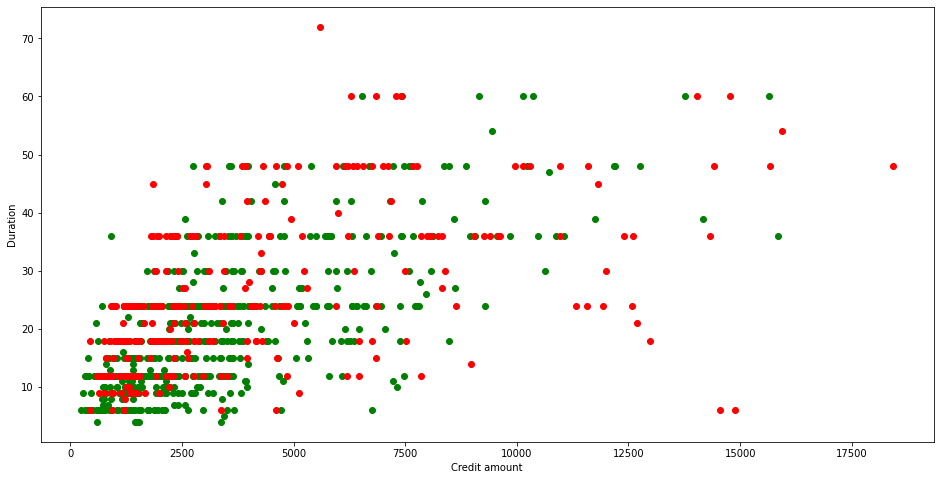

In [ ]:
plt.figure(figsize=(16, 8))
plt.scatter(data[data['credit_risk'] == 'good']['amount'], data[data['credit_risk'] == 'good']['duration'], color = 'g')
plt.scatter(data[data['credit_risk'] == 'bad']['amount'], data[data['credit_risk'] == 'bad']['duration'], color = 'r')
plt.xlabel('Credit amount')
plt.ylabel('Duration')
#диаграмма с продолжительностью и размерами кредитов в качестве осей.
#чем меньше продолжительность и размер кредита, тем больше хороших оценок. Видно, что есть наиболее популярные продолжительности.
#чем меньше продолжительность и больше сумма, тем больше плохих оценок

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

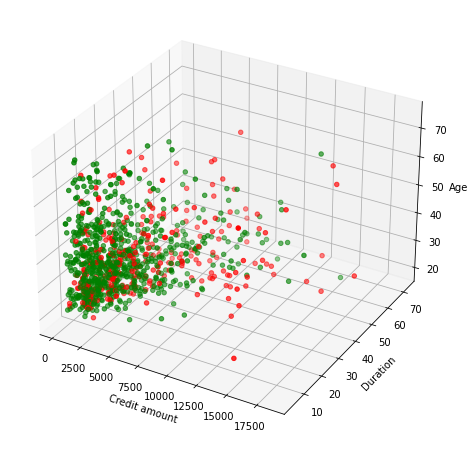

In [ ]:
# your code here

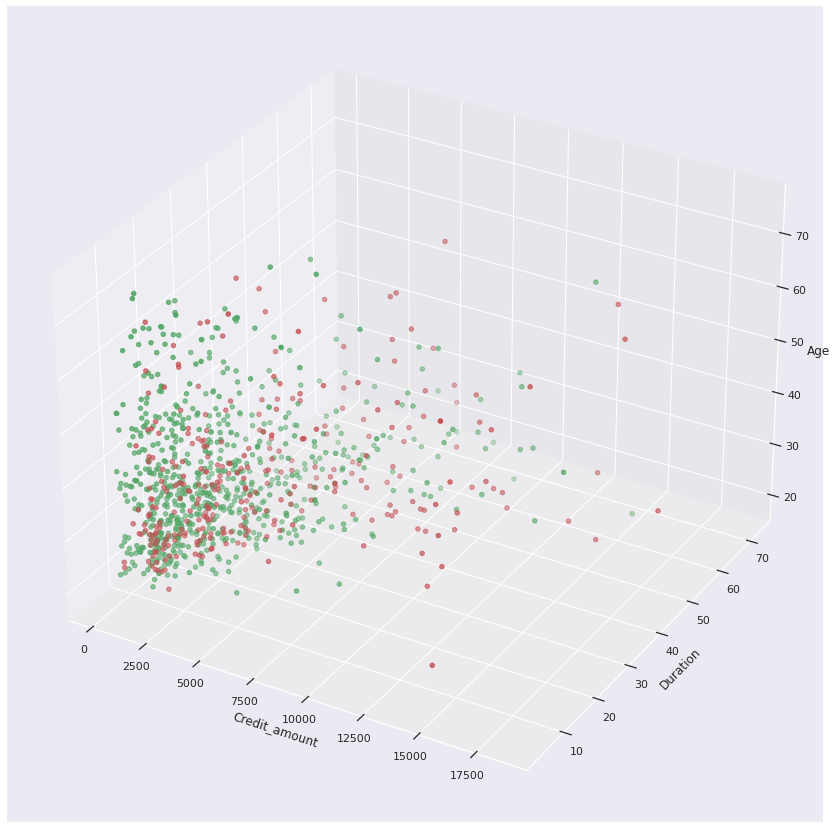

In [ ]:
from mpl_toolkits.mplot3d import Axes3D 
sns.set(style = "darkgrid") 
 
fig = plt.figure() 

ax = fig.add_subplot(projection = '3d') 
fig.set_size_inches(15,15)
x = data[data['credit_risk'] == 'good']['amount']
y =  data[data['credit_risk'] == 'good']['duration']
z =  data[data['credit_risk'] == 'good']['age']
x1 = data[data['credit_risk'] == 'bad']['amount']
y1 =  data[data['credit_risk'] == 'bad']['duration']
z1 =  data[data['credit_risk'] == 'bad']['age']
 
ax.set_xlabel("Credit_amount") 
ax.set_ylabel("Duration") 
ax.set_zlabel("Age") 
 
ax.scatter(x, y, z ,color = 'g')
ax.scatter(x1, y1, z1,  color = 'r')
 
plt.show() 
#чем старше человек, тем больше положительных оценок.
#наибольшее количество хороших оценок у людей старшего возраста, которые взяли маленькие суммы на недолгое время.
#чем моложе человек, тем больше плохих.
#большинство берет менее 2500 на срок от 10 до 50 и в возрасте 20 лет.

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [5]:
#Количественные признаки - duration, amount, age
#Бинарные - telephone, foreign_worker
#Порядковые - employment_duration, installment_rate, present_residence, status, people_liable, number_credits, savings- упорядоченная категория
#Категориальные - credit_history, purpose, personal_status_sex, other_debtors, property, other_installment_plans, housing, job
#удаляем все категориальные признаки, оставив housing, так как подумала, что он играет роль при определении ответа
data_without_factors = data.drop(['credit_history','purpose', 'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans', 'job'], 1 )

<ipython-input-5-439163cca297>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_without_factors = data.drop(['credit_history','purpose', 'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans', 'job'], 1 )


Перевли бинарные и порядковые столбцы в числа

In [6]:
data_without_factors.loc[data["housing"] == "rent", "housing"] = 0
data_without_factors.loc[data["housing"] == "for free", "housing"] = 1
data_without_factors.loc[data["housing"] == "own", "housing"] = 2
#
data_without_factors.loc[data["telephone"] == "no", "telephone"] = 0
data_without_factors.loc[data["telephone"] == "yes (under customer name)", "telephone"] = 1
#
data_without_factors.loc[data["foreign_worker"] == "no", "foreign_worker"] = 0
data_without_factors.loc[data["foreign_worker"] == "yes", "foreign_worker"] = 1
#
data_without_factors.loc[data["employment_duration"] == "unemployed", "employment_duration"] = 0
data_without_factors.loc[data["employment_duration"] == "< 1 yr", "employment_duration"] = 1
data_without_factors.loc[data["employment_duration"] == "1 <= ... < 4 yrs", "employment_duration"] = 2
data_without_factors.loc[data["employment_duration"] == "4 <= ... < 7 yrs", "employment_duration"] = 3
data_without_factors.loc[data["employment_duration"] == ">= 7 yrs", "employment_duration"] = 4
#
data_without_factors.loc[data["installment_rate"] == "< 20", "installment_rate"] = 0
data_without_factors.loc[data["installment_rate"] == "20 <= ... < 25", "installment_rate"] = 1
data_without_factors.loc[data["installment_rate"] == "25 <= ... < 35", "installment_rate"] = 2
data_without_factors.loc[data["installment_rate"] == ">= 35", "installment_rate"] = 3
#
data_without_factors.loc[data["present_residence"] == "< 1 yr", "present_residence"] = 0
data_without_factors.loc[data["present_residence"] == "1 <= ... < 4 yrs", "present_residence"] = 1
data_without_factors.loc[data["present_residence"] == "4 <= ... < 7 yrs", "present_residence"] = 2
data_without_factors.loc[data["present_residence"] == ">= 7 yrs", "present_residence"] = 3
#
data_without_factors.loc[data["status"] == "no checking account", "status"] = 0
data_without_factors.loc[data["status"] == "... < 0 DM", "status"] = 1
data_without_factors.loc[data["status"] == "0<= ... < 200 DM", "status"] = 2
data_without_factors.loc[data["status"] == "... >= 200 DM / salary for at least 1 year", "status"] = 3
#
data_without_factors.loc[data["people_liable"] == "0 to 2", "people_liable"] = 0
data_without_factors.loc[data["people_liable"] == "3 or more", "people_liable"] = 1
#
data_without_factors.loc[data["number_credits"] == "1", "number_credits"] = 0
data_without_factors.loc[data["number_credits"] == "2-3", "number_credits"] = 1
data_without_factors.loc[data["number_credits"] == "4-5", "number_credits"] = 2
data_without_factors.loc[data["number_credits"] == ">= 6", "number_credits"] = 3
#
data_without_factors.loc[data["savings"] == "unknown/no savings account", "savings"] = 0
data_without_factors.loc[data["savings"] == "... <  100 DM", "savings"] = 1
data_without_factors.loc[data["savings"] == "100 <= ... <  500 DM", "savings"] = 2
data_without_factors.loc[data["savings"] == "500 <= ... < 1000 DM", "savings"] = 3
data_without_factors.loc[data["savings"] == "... >= 1000 DM", "savings"] = 4
#можно перевести целевую переменную в целочисленный тип, чтобы посмотреть зависимости.
#data_without_factors.loc[data["credit_risk"] == "bad", "credit_risk"] = 0
#data_without_factors.loc[data["credit_risk"] == "good", "credit_risk"] = 1

In [7]:
# with column name and data type
data_types_dict = {'housing': int ,
                   'telephone' : int,
                   "foreign_worker":int,
                   "employment_duration": int,
                   "installment_rate":int, 
                   "present_residence":int,
                   "status":int,
                   "people_liable":int,
                   "number_credits":int,
                   "savings":int}
                   #"credit_risk":int}  
#меняем типы на целочисленный тип, чтобы посчитать расстояние между признаками
data_without_factors = data_without_factors.astype(data_types_dict)

In [8]:
#смотрим типы и колонки
data_without_factors.dtypes

status                  int64
duration                int64
amount                  int64
savings                 int64
employment_duration     int64
installment_rate        int64
present_residence       int64
age                     int64
housing                 int64
number_credits          int64
people_liable           int64
telephone               int64
foreign_worker          int64
credit_risk            object
dtype: object

In [ ]:
data_without_factors.corr()['credit_risk']#если перевести и целевую переменную к типу int, то можно посмотреть зависимости

status                 0.350847
duration              -0.214927
amount                -0.154740
savings                0.178943
employment_duration    0.116002
installment_rate       0.072404
present_residence     -0.002967
age                    0.091272
housing               -0.130077
number_credits         0.045732
people_liable          0.003015
telephone              0.036466
foreign_worker         0.082079
credit_risk            1.000000
Name: credit_risk, dtype: float64

In [ ]:
#итоговый датафрейм, с которым будем работать (с удаленными категориальными, с переведенными бинарными и порядковыми признакками)
data_without_factors

,status,duration,amount,savings,employment_duration,installment_rate,present_residence,age,housing,number_credits,people_liable,telephone,foreign_worker,credit_risk
0,0,18,1049,0,1,0,3,21,1,0,0,0,0,good
1,0,9,2799,0,2,2,1,36,1,1,1,0,0,good
2,1,12,841,1,3,2,3,23,1,0,0,0,0,good
3,0,12,2122,0,2,1,1,39,1,1,1,0,1,good
4,0,12,2171,0,2,0,3,38,0,1,0,0,1,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,24,1987,0,2,2,3,21,1,0,1,0,0,bad
996,0,24,2303,0,4,0,0,45,0,0,0,0,0,bad
997,3,21,12680,4,4,0,3,30,2,0,0,1,0,bad
998,1,12,6468,4,0,2,0,52,0,0,0,1,0,bad


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [ ]:
#можно для всех выдавать good и получить точность 0.66
def predict(Xtest: np.array) -> np.array:
    mas = np.array(['good' for _ in range(len(Xtest))])
    return mas

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
# Используйте X_train и y_train на ваше усмотрение
# your code here
accuracy_score(y_test, predict(X_test))

<ipython-input-174-f8beabc37aee>:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = data.drop('credit_risk', 1).values


0.66

In [14]:
#используя метод 4 ближайших соседей удалось добиться точности 0.72
#масштабирование помогло добиться более высокой точности
import statistics as st
def predict(Xtrain: np.array, ytrain: np.array, Xtest: np.array) -> np.array:
    mas = []    
    k = 4
    for row in Xtest:
      distances = np.linalg.norm(Xtrain - row, axis=1)#вектор расстояний до текущей точки      
      nearest_neighbor_ids = distances.argsort()[:k]
      class_neighbors = ytrain[nearest_neighbor_ids]
      mas.append(st.mode(class_neighbors))
    return mas

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
#preprocessing.normalize(housing, axis=0)
X = preprocessing.normalize(data_without_factors.drop('credit_risk', 1).values, axis=0)
y = data_without_factors['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
# Используйте X_train и y_train на ваше усмотрение
# your code here
accuracy_score(y_test, predict(X_train,y_train, X_test))

<ipython-input-14-17e486d13796>:19: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = preprocessing.normalize(data_without_factors.drop('credit_risk', 1).values, axis=0)


0.72